In [6]:
import numpy as np
import pandas as pd


In [7]:
df = pd.DataFrame(np.ones([5,4]), columns=['a', 'b','c', 'd'])
df

,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [8]:
df *=2
df

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0


In [9]:
df.loc[1]/=2
df['b']-=1
df


,a,b,c,d
0,2.0,1.0,2.0,2.0
1,1.0,0.0,1.0,1.0
2,2.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0
4,2.0,1.0,2.0,2.0


In [13]:
df2 = pd.DataFrame(np.ones([3,2]), index=[2,4,5], columns=['d','e'])
df2

,d,e
2,1.0,1.0
4,1.0,1.0
5,1.0,1.0


In [14]:
df + df2 #only the indices that match exactly will be operated

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,3.0,NaN
5,NaN,NaN,NaN,NaN,NaN


In [15]:
df.loc[2] * df2.loc[5] #the same thing happens for 2 series

a    NaN
b    NaN
c    NaN
d    2.0
e    NaN
dtype: float64

In [17]:
df- df.mean()

,a,b,c,d
0,0.2,0.2,0.2,0.2
1,-0.8,-0.8,-0.8,-0.8
2,0.2,0.2,0.2,0.2
3,0.2,0.2,0.2,0.2
4,0.2,0.2,0.2,0.2


In [19]:
df

,a,b,c,d
0,2.0,1.0,2.0,2.0
1,1.0,0.0,1.0,1.0
2,2.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0
4,2.0,1.0,2.0,2.0


In [20]:
df - pd.Series({'a':5, 'b':5, 'e':5, 'f':5}) #same thing happens, only values that exist in both elements are operated and the rest is converted to NaN

,a,b,c,d,e,f
0,-3.0,-4.0,NaN,NaN,NaN,NaN
1,-4.0,-5.0,NaN,NaN,NaN,NaN
2,-3.0,-4.0,NaN,NaN,NaN,NaN
3,-3.0,-4.0,NaN,NaN,NaN,NaN
4,-3.0,-4.0,NaN,NaN,NaN,NaN


In [23]:
df - df.mean(axis=1) #same thing for rows so basically the rows are transposed to the end of the columns because the series is considered to be a table of 1 row 

,a,b,c,d,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.sub(df.mean(axis=1), axis=0) #subtract the mean of each rom FROM EACH ROW

,a,b,c,d
0,0.25,-0.75,0.25,0.25
1,0.25,-0.75,0.25,0.25
2,0.25,-0.75,0.25,0.25
3,0.25,-0.75,0.25,0.25
4,0.25,-0.75,0.25,0.25


In [26]:
df.mean(axis=1)

0    1.75
1    0.75
2    1.75
3    1.75
4    1.75
dtype: float64

In [27]:
df

,a,b,c,d
0,2.0,1.0,2.0,2.0
1,1.0,0.0,1.0,1.0
2,2.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0
4,2.0,1.0,2.0,2.0


In [29]:
df = pd.DataFrame({'sin': np.arange(0,5*np.pi, 0.01),
                    'cos': np.arange(0.5*np.pi, 5.5*np.pi, 0.01)})
df 

,sin,cos
0,0.00,1.570796
1,0.01,1.580796
2,0.02,1.590796
3,0.03,1.600796
4,0.04,1.610796
...,...,...
1566,15.66,17.230796
1567,15.67,17.240796
1568,15.68,17.250796
1569,15.69,17.260796


In [30]:
df = np.sin(df) #universal function

<AxesSubplot:>

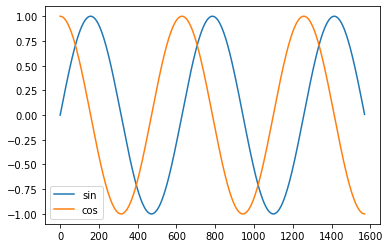

In [32]:
%matplotlib inline
df.plot()

In [34]:
def iqr(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    return q3 - q1

df.apply(iqr)   #applies function to all columns

sin    1.347237
cos    1.413649
dtype: float64

In [35]:
df.apply(iqr, axis=1) #applies function to all rows

0       0.500000
1       0.494975
2       0.489901
3       0.484777
4       0.479605
          ...   
1566    0.523397
1567    0.518617
1568    0.513784
1569    0.508900
1570    0.503966
Length: 1571, dtype: float64

In [37]:
def somefunc(x):
    return np.abs(x+0.25)

In [38]:
df.applymap(somefunc) #function applied to every cell

,sin,cos
0,0.250000,1.250000
1,0.260000,1.249950
2,0.269999,1.249800
3,0.279996,1.249550
4,0.289989,1.249200
...,...,...
1566,0.297945,0.748850
1567,0.287954,0.749279
1568,0.277960,0.749609
1569,0.267962,0.749839


<AxesSubplot:>

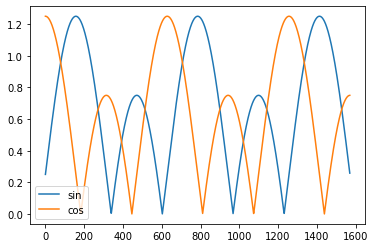

In [39]:
df.applymap(somefunc).plot()